In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# ...................................................................IMPORTING SOME LIBRARIES..................................................
import numpy as np 
import pandas as pd 
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/covid_dataset_2/train'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
!pip install imutils

In [ ]:
#..........................................SOME MORE..................................................

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
#...................................INITIALISING SOME BASIC PARAMETERS TO BE USED IN THE PROJECT....................................................
INIT_LR = 1e-4
EPOCHS = 14
BS = 32

In [ ]:
print(os.listdir("/content/drive/My Drive/covid_dataset_2/train"))        

['non', 'covid']


In [ ]:
imagePaths_non = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/train/non'))

print(len(imagePaths_non))

2601


In [ ]:
imagePaths_covid = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/train/covid'))

print(len(imagePaths_covid))

144


In [ ]:
testing_check_covid=list(paths.list_images('/content/drive/My Drive/covid_dataset_2/test/covid'))
testing_check_NON_covid=list(paths.list_images('/content/drive/My Drive/covid_dataset_2/test/non'))
print(len(testing_check_covid))
print(len(testing_check_NON_covid))

40
1000


In [ ]:
imagePaths_non = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/train/non'))

print(type(imagePaths_non))

<class 'list'>


In [ ]:
imagePaths_covid = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/train/covid'))

print(type(imagePaths_covid))

<class 'list'>


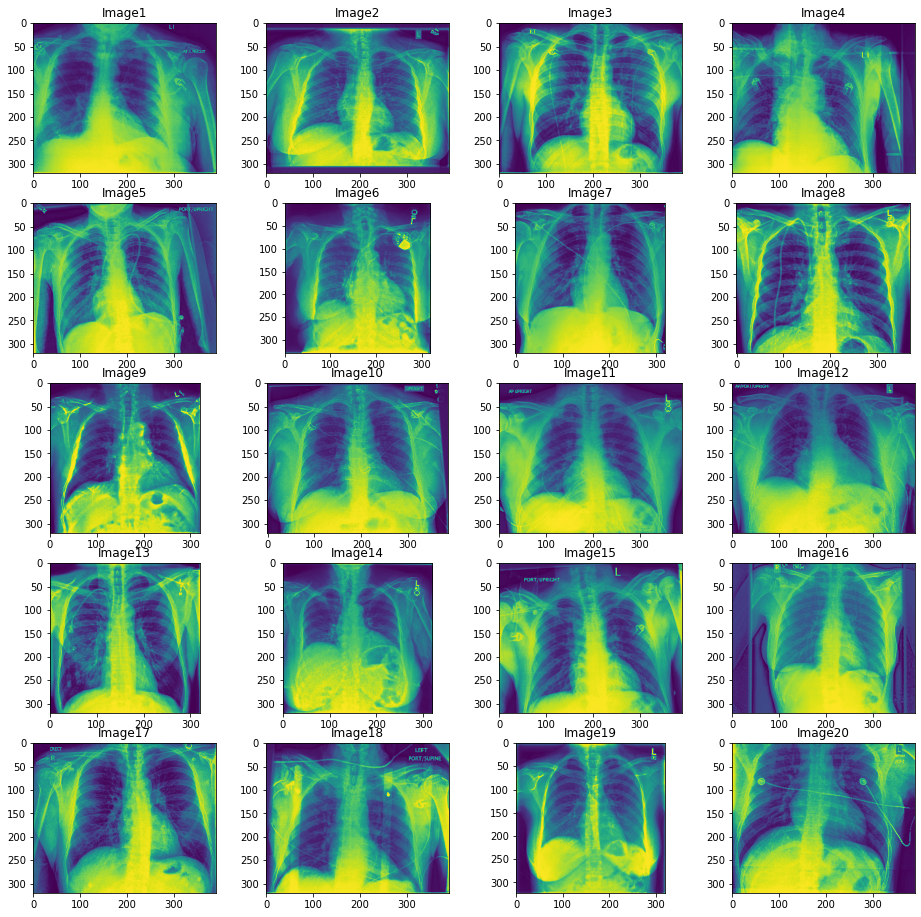

In [ ]:
import matplotlib.pyplot as plt
k=1
plt.figure(figsize=(16,16))
sub="20"
for x in range(0,5):
  for y in range(0,4):
    plt.subplot(5,4,k)
    plt.title('Image'+str(k))
    t=plt.imread(imagePaths_non[k])
    plt.imshow(t)
    k+=1

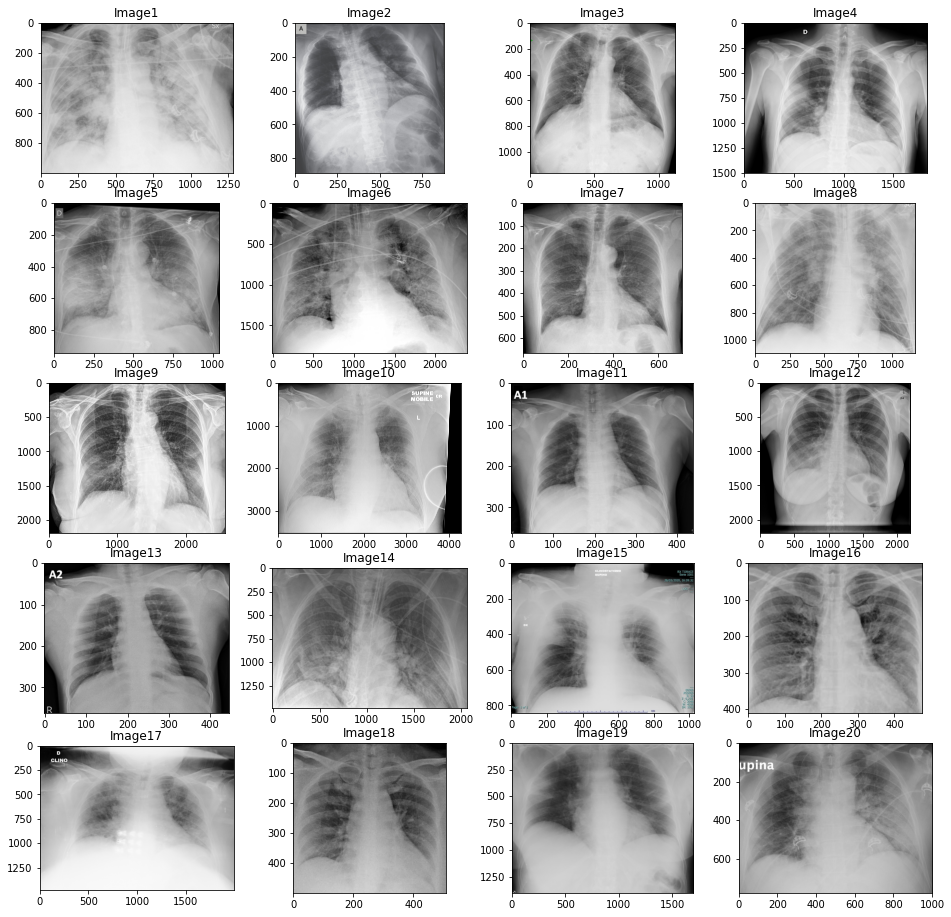

In [ ]:
import matplotlib.pyplot as plt
k=1
imagenumber=50
plt.figure(figsize=(16,16))
sub="20"
for x in range(0,5):
  for y in range(0,4):
    plt.subplot(5,4,k)
    plt.title('Image'+str(k))
    t=plt.imread(imagePaths_covid[imagenumber])
    plt.imshow(t)
    k+=1
    imagenumber+=1

In [ ]:
data = []
labels = []

In [ ]:
print("[INFO] how many images...")
imagePaths_non = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/train/non'))
print(len(imagePaths_non))

for imagePath in imagePaths_non:
	
	label ="non"

	
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	
	data.append(image)
	labels.append(label)

[INFO] how many images...
2601


In [ ]:
print("[INFO] loading images...")
imagePaths_covid = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/train/covid'))

print(len(imagePaths_covid))

for imagePath in imagePaths_covid:
	
	label ="covid"

	
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	
	data.append(image)
	labels.append(label)

[INFO] loading images...
144


In [ ]:

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
labels.shape

(2745, 2)

In [ ]:

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.25, stratify=labels, random_state=42)

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:

baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)


for layer in baseModel.layers:
	layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:

print("[INFO] compiling the model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / 10)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=10)

[INFO] compiling the model...
[INFO] training head...
Epoch 1/10
64/64 [==============================] - 21s 332ms/step - loss: 0.3208 - accuracy: 0.9008 - val_loss: 0.1884 - val_accuracy: 0.9476
Epoch 2/10
64/64 [==============================] - 20s 314ms/step - loss: 0.1815 - accuracy: 0.9492 - val_loss: 0.1526 - val_accuracy: 0.9491
Epoch 3/10
64/64 [==============================] - 20s 314ms/step - loss: 0.1447 - accuracy: 0.9531 - val_loss: 0.1263 - val_accuracy: 0.9520
Epoch 4/10
64/64 [==============================] - 20s 315ms/step - loss: 0.1226 - accuracy: 0.9580 - val_loss: 0.1101 - val_accuracy: 0.9534
Epoch 5/10
64/64 [==============================] - 20s 316ms/step - loss: 0.0959 - accuracy: 0.9674 - val_loss: 0.0906 - val_accuracy: 0.9592
Epoch 6/10
64/64 [==============================] - 20s 315ms/step - loss: 0.0882 - accuracy: 0.9709 - val_loss: 0.0893 - val_accuracy: 0.9738
Epoch 7/10
64/64 [==============================] - 20s 313ms/step - loss: 0.0813 - accu

In [ ]:

print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)


predIdxs = np.argmax(predIdxs, axis=1)

trainlabels=[]
for x,y in trainY:
    if(x==1):
        trainlabels.append(0)
    else:
        trainlabels.append(1)
        
testlabels=[]
for x,y in testY:
    if(x==1):
        testlabels.append(0)
    else:
        testlabels.append(1)
        
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(testlabels, predIdxs))
print("f1 score",f1_score(testlabels, predIdxs))

[INFO] evaluating network...
[[ 27   9]
 [  3 648]]
f1 score 0.9908256880733944


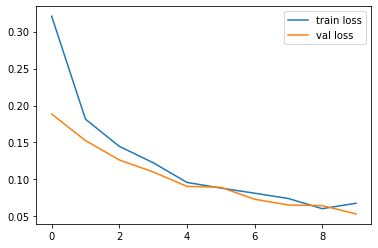

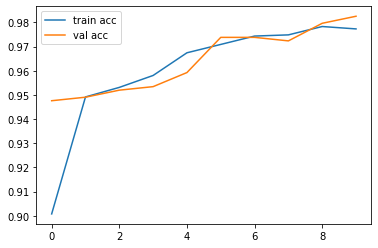

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
yt=model.predict(trainX, batch_size=BS)
yt=np.argmax(yt,axis=1)

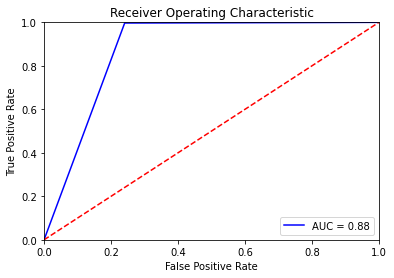

In [ ]:

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(trainlabels,yt )
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

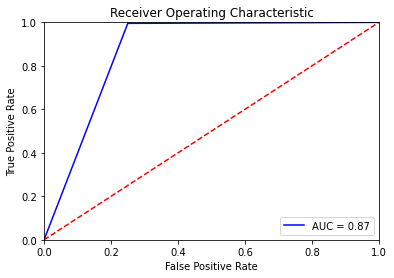

In [ ]:

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testlabels, predIdxs)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##just checked 10 images

In [ ]:
testing_check_NON_covid=list(paths.list_images('/content/drive/My Drive/temp_covid_checking'))

print(len(testing_check_NON_covid))

NameError: ignored

In [ ]:
data=[]
test_image_path=list(paths.list_images('/content/drive/My Drive/temp_covid_checking'))
#print(test_image_path)
print(len(test_image_path))
for imagePath in test_image_path:
	
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	data.append(image)

NameError: ignored

In [ ]:
data=np.array(data,dtype='float32')

In [ ]:
pred=model.predict(data, batch_size=32)
pred = np.argmax(pred, axis=1)

In [ ]:
print(pred)          # 0 means covid............

In [ ]:
pred

In [ ]:
import matplotlib.pyplot as plt
k=1
imagenumber=0
plt.figure(figsize=(16,16))
sub="20"
for x in range(0,5):
  for y in range(0,2):
    plt.subplot(10,2,k)
    s=""
    if(pred[k-1]==0):
      s="Aapko Covid Hai"
      c='r'
    else:
      s="Aap Bach gye !!"
      c='g'
    pob=plt.title(s)
    plt.setp(pob,color=c)
    t=plt.imread(test_image_path[imagenumber])
    plt.imshow(t)
    k+=1
    imagenumber+=1

In [ ]:
from tensorflow.keras.models import load_model


model.save_weights('Kd_Kn_Model.h5')

model.save('/content/drive/My Drive/Colab Notebooks/Kd_Kn_Model.h5')

In [ ]:
mymodel=load_model("/content/drive/My Drive/Colab Notebooks/Kd_Kn_Model.h5")



In [ ]:
mymodel.summary()

In [ ]:
mymodel.predict()

## testing the validation data


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
mymodel=load_model("/content/drive/My Drive/Colab Notebooks/Kd_Kn_Model.h5")

In [ ]:
mymodel.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
test_check_covid=list(paths.list_images('/content/drive/My Drive/covid_dataset_2/test/covid'))

print(len(test_check_covid))

50


In [ ]:
test_check_NON_covid=list(paths.list_images('/content/drive/My Drive/covid_dataset_2/test/non'))

print(len(test_check_NON_covid))

1040


In [ ]:
data= []
labels= []

In [ ]:
print("[INFO] how many images...")
imagePaths_non = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/test/non'))
print(len(imagePaths_non))

for imagePath in imagePaths_non:
	
	label ="non"

	
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	
	data.append(image)
	labels.append(label)

[INFO] how many images...
1040


In [ ]:
print("[INFO] loading images...")
imagePaths_covid = list(paths.list_images('/content/drive/My Drive/covid_dataset_2/test/covid'))

print(len(imagePaths_covid))

for imagePath in imagePaths_covid:
	
	label ="covid"

	
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	
	data.append(image)
	labels.append(label)

[INFO] loading images...
50


In [ ]:

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
labels.shape

(1090, 2)

In [ ]:
pred=mymodel.predict(data, batch_size=32)
pred = np.argmax(pred, axis=1)


In [ ]:
pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
testlabels=[]
for x,y in labels:
    if(x==1):
        testlabels.append(0)
    else:
        testlabels.append(1)

In [ ]:
testlabels

In [ ]:
testlabels.count(0)
#testlabels.count(1)

50

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(testlabels, pred))
print("f1 score",f1_score(testlabels, pred))

[[  32   18]
 [  33 1007]]
f1 score 0.9753026634382567


In [25]:
!pip install flask-ngrok

In [23]:
!ngrok authtoken 1nNiWXpwdXRjJN48535t3deJAl2_2ZJA6sBqNFM8EkGp5U63E

/bin/bash: ngrok: command not found


In [29]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np

# Keras
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
#from gevent.pywsgi import WSGIServer

# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH ='/content/drive/MyDrive/Colab Notebooks/Kd_Kn_Model.h5'

# Load your trained model
model = load_model(MODEL_PATH)




def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

   

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
      preds="Sorry to say you are diagnosed with covid "
    else:
      preds="No need to worry you are safe"
    
    
    
    return preds


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')

run_with_ngrok(app)
@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path, model)
        result=preds
        return result
    return None


#if __name__ == '__main__':
app.run()

ModuleNotFoundError: ignored